In [1]:
#Importing required libraries and warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Cleaning of all datasets

In [2]:
#Reading the datasets
cycle = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\IIIT-B\Capstone Project IIIT-B\CycleData.csv")
delay = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\IIIT-B\Capstone Project IIIT-B\DelayData.csv")
location = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\IIIT-B\Capstone Project IIIT-B\LocationData.csv")

### Read and understand the datasets

In [3]:
cycle.head()

,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Creation Mode,CT Calendar SMU Time,CT Calendar Time,...,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Crew OID,Job Code Description,Job Code Name,Job Type
0,NaN,737,1.0,737,737,1,737,0,737,737,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
1,NaN,527,1.0,527,527,1,527,0,527,527,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
2,NaN,496,1.0,292,496,1,496,0,264,496,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
3,NaN,714,1.0,420,714,1,714,0,403,714,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
4,NaN,512,1.0,300,512,1,512,0,300,512,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN


In [4]:
delay.head()

,Delay OID,Description,ECF Class ID,Acknowledge Flag,Acknowledged Flag,Confirmed Flag,Engine Stopped Flag,Field Notification Required Flag,Office Confirm Flag,Production Reporting Only Flag,...,Target Machine is Active Flag,Target Machine Class Name,Target Machine Class Description,Target Machine Class is Active Flag,Target Machine Class Category Name,Delay Reported By Person Name,Delay Reported By User Name,Delay Status Description,Delay Start Timestamp (GMT8),Delay Finish Timestamp (GMT8)
0,10721642969,MACHINE GEN Started a delay: 2110_Operator_Hot...,XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,994H,Wheel Loader,Y,Loader Classes,Daniel Nye,NaN,Historical,2020-07-26 02:04:59,2020-07-26 02:08:41
1,10721643044,6026,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 01:59:06,2020-07-26 02:05:54
2,10721643462,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]],XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:13,2020-07-26 02:06:24
3,10721643635,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]] acces...,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:25,2020-07-26 02:23:48
4,10721645207,5271,XAEntity.Delay,N,N,N,N,Y,N,N,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,Casey Ruck,Historical,2020-07-26 02:09:44,2020-07-26 02:15:00


In [5]:
location.head()

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552


In [6]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47344 entries, 0 to 47343
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ASSOCPAYLOADNOMINAL                         21992 non-null  float64
 1   AT Available Time (iMine)                   47344 non-null  int64  
 2   Autonomous                                  44582 non-null  float64
 3   Available SMU Time                          47344 non-null  int64  
 4   Available Time                              47344 non-null  int64  
 5   Completed Cycle Count                       47344 non-null  int64  
 6   COMPLETEDCYCLEDURATION                      47344 non-null  int64  
 7   Creation Mode                               47344 non-null  int64  
 8   CT Calendar SMU Time                        47344 non-null  int64  
 9   CT Calendar Time                            47344 non-null  int64  
 10  Cycle Dura

In [7]:
delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Delay OID                            8782 non-null   int64  
 1   Description                          6701 non-null   object 
 2   ECF Class ID                         8782 non-null   object 
 3   Acknowledge Flag                     8782 non-null   object 
 4   Acknowledged Flag                    8782 non-null   object 
 5   Confirmed Flag                       8782 non-null   object 
 6   Engine Stopped Flag                  8782 non-null   object 
 7   Field Notification Required Flag     8782 non-null   object 
 8   Office Confirm Flag                  8782 non-null   object 
 9   Production Reporting Only Flag       8782 non-null   object 
 10  Frequency Type                       8782 non-null   int64  
 11  Shift Type                    

In [8]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location_Id  31 non-null     int64  
 1   Name         31 non-null     object 
 2   Latitude     31 non-null     float64
 3   Longitude    31 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
cycle.describe()

,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Creation Mode,CT Calendar SMU Time,CT Calendar Time,...,Travelling Empty Duration,Travelling Full Duration,TRUCKQUEUEATSOURCEDURATION,UNSCHEDULEDDOWNCOUNT,UNSCHEDULEDDOWNTIME,WAITFORDUMPDURATION,WAITFORLOADDURATION,WORKINGBURNRATE,WORKINGDURATION,Crew OID
count,21992.000000,47344.000000,44582.000000,4.734400e+04,47344.000000,47344.000000,47344.000000,47344.000000,4.734400e+04,47344.00000,...,44582.000000,44582.000000,21992.000000,47344.0,47344.000000,22590.000000,22590.0,47344.000000,47344.000000,4.734400e+04
mean,236726.082212,1669.828299,0.505944,1.029385e+03,1669.828299,0.953954,1316.291526,0.040343,1.218833e+03,1918.58546,...,232.600781,272.520412,172.488905,0.0,379.654402,34.019212,0.0,0.000023,1079.787196,1.072034e+10
std,27839.845082,4524.477286,0.499970,3.950018e+04,4524.477286,0.209587,2649.181559,0.416962,3.962458e+04,5337.67353,...,316.285592,326.533195,231.362611,0.0,3160.908112,87.041427,0.0,0.000160,2809.399233,1.284002e+06
min,0.000000,0.000000,0.000000,-2.426500e+04,0.000000,0.000000,0.000000,0.000000,-4.853000e+04,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.071815e+10
25%,240000.000000,271.000000,0.000000,2.700000e+01,271.000000,1.000000,245.000000,0.000000,3.700000e+01,276.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,197.000000,1.071929e+10
50%,240000.000000,868.000000,1.000000,3.760000e+02,868.000000,1.000000,761.000000,0.000000,4.125000e+02,893.00000,...,0.000000,0.000000,93.000000,0.0,0.000000,0.000000,0.0,0.000000,507.000000,1.072034e+10
75%,240000.000000,1581.000000,1.000000,1.326000e+03,1581.000000,1.000000,1546.000000,0.000000,1.344000e+03,1597.00000,...,431.000000,557.000000,243.000000,0.0,0.000000,5.000000,0.0,0.000041,1302.000000,1.072147e+10
max,240000.000000,86400.000000,1.000000,8.577780e+06,86400.000000,1.000000,43023.000000,8.000000,8.577451e+06,86400.00000,...,5299.000000,2715.000000,3005.000000,0.0,43200.000000,1859.000000,0.0,0.021993,43200.000000,1.072258e+10


In [10]:
delay.describe()

,Delay OID,Frequency Type,Shift Type,Target Location,Target Road
count,8.782000e+03,8782.0,0.0,0.0,0.0
mean,1.072047e+10,0.0,NaN,NaN,NaN
std,1.247348e+06,0.0,NaN,NaN,NaN
min,1.071828e+10,0.0,NaN,NaN,NaN
25%,1.071944e+10,0.0,NaN,NaN,NaN
50%,1.072047e+10,0.0,NaN,NaN,NaN
75%,1.072156e+10,0.0,NaN,NaN,NaN
max,1.072270e+10,0.0,NaN,NaN,NaN


In [11]:
cycle.columns

Index(['ASSOCPAYLOADNOMINAL', 'AT Available Time (iMine)', 'Autonomous',
       'Available SMU Time', 'Available Time', 'Completed Cycle Count',
       'COMPLETEDCYCLEDURATION', 'Creation Mode', 'CT Calendar SMU Time',
       'CT Calendar Time', 'Cycle Duration', 'Cycle SMU Duration',
       'Cycle Type', 'Delay Time', 'Down Time', 'DTE Down Time Equipment',
       'Dumping Duration', 'Dumping SMU Duration',
       'Destination Dumping Start Timestamp (GMT8)', 'Empty EFH Distance',
       'Empty EFH Length', 'Empty Expected Travel Duration',
       'Empty Fall Height', 'Empty Plan Length', 'Empty Rise Height',
       'Empty Slope Distance', 'Empty Slope Length',
       'Empty Target Travel Duration', 'Empty Travel Duration',
       'End Processor Name', 'Cycle End Timestamp (GMT8)',
       'Estimated Fuel Used', 'Fuel Used', 'Full Expected Travel Duration',
       'Full Travel Duration', 'IC', 'Idle Duration', 'iMine Availability',
       'iMine Engine Hours', 'iMine Load FCTR Truck', 

In [12]:
#From cycle dataset taking the key elements from the dataset
c_k = cycle[["Available Time", "Completed Cycle Count", "COMPLETEDCYCLEDURATION", "Cycle SMU Duration", "Cycle Type", "Delay Time", "Down Time", "DTE Down Time Equipment", "Dumping Duration", "Empty EFH Distance", "Empty Expected Travel Duration", "Empty Travel Duration", "Cycle End Timestamp (GMT8)", "Estimated Fuel Used", "Fuel Used", "Full Expected Travel Duration", "Full Travel Duration", "Idle Duration", "Loading Duration", "OPERATINGTIME (CAT)", "OPERHOURSSECONDS", "Payload (kg)", "Payload (t)", "PREVIOUSSECONDARYMACHINE", "PREVIOUSSINKDESTINATION", "Queuing at Sink Duration", "Queuing at Source Duration", "Queuing Duration", "SD_SCHEDULEDDOWNTIME", "Cycle Start Timestamp (GMT8)", "TC", "TMPH", "TOTALTIME (CAT)", "Travelling Empty Duration", "Travelling Full Duration", "UNSCHEDULEDDOWNTIME", "WAITFORDUMPDURATION", "WAITFORLOADDURATION", "WORKINGDURATION", "Source Location Name", "Source Location is Active Flag", "Destination Location Name", "Destination Location is Active Flag", "Primary Machine Name", "Primary Machine Category Name", "Primary Machine Class Name", "Secondary Machine Name", "Secondary Machine Category Name", "Secondary Machine Class Name", "Job Code Name", "Job Type"]]

In [13]:
c_k.head()

,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Cycle SMU Duration,Cycle Type,Delay Time,Down Time,DTE Down Time Equipment,Dumping Duration,Empty EFH Distance,...,Destination Location Name,Destination Location is Active Flag,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Job Code Name,Job Type
0,737,1,737,737,TruckCycle,0,0,0,51.0,1628.71280,...,DS_C1,Y,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN
1,527,1,527,527,TruckCycle,0,0,0,50.0,244.76375,...,DS_C1,Y,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN
2,496,1,496,292,TruckCycle,0,0,0,51.0,255.88503,...,DS_C1,Y,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN
3,714,1,714,420,TruckCycle,0,0,0,51.0,333.25912,...,DS_C1,Y,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN
4,512,1,512,300,TruckCycle,0,0,0,52.0,244.76375,...,DS_C1,Y,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN


In [14]:
c_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47344 entries, 0 to 47343
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Available Time                       47344 non-null  int64  
 1   Completed Cycle Count                47344 non-null  int64  
 2   COMPLETEDCYCLEDURATION               47344 non-null  int64  
 3   Cycle SMU Duration                   47344 non-null  int64  
 4   Cycle Type                           47344 non-null  object 
 5   Delay Time                           47344 non-null  int64  
 6   Down Time                            47344 non-null  int64  
 7   DTE Down Time Equipment              47344 non-null  int64  
 8   Dumping Duration                     22590 non-null  float64
 9   Empty EFH Distance                   22590 non-null  float64
 10  Empty Expected Travel Duration       22590 non-null  float64
 11  Empty Travel Duration       

In [15]:
#Now to calculate the missing values in the dataset
c_k.isnull().sum().sort_values(ascending=False)

Job Type                               46545
PREVIOUSSINKDESTINATION                24828
Destination Location Name              24789
Fuel Used                              24754
WAITFORLOADDURATION                    24754
WAITFORDUMPDURATION                    24754
TMPH                                   24754
Queuing Duration                       24754
Queuing at Source Duration             24754
Full Travel Duration                   24754
Full Expected Travel Duration          24754
Queuing at Sink Duration               24754
Dumping Duration                       24754
Empty Travel Duration                  24754
Empty Expected Travel Duration         24754
Empty EFH Distance                     24754
PREVIOUSSECONDARYMACHINE                2926
Source Location Name                    2867
Travelling Full Duration                2762
Loading Duration                        2762
Travelling Empty Duration               2762
Payload (kg)                            2762
Payload (t

- From the missing values these are key columns for TruckCycle 'PREVIOUSSINKDESTINATION', 'Destination Location Name', 'Fuel Used','WAITFORLOADDURATION', 'WAITFORDUMPDURATION', 'TMPH', 'Queuing Duration', 'Queuing at Source Duration', 'Full Travel Duration', 'Full Expected Travel Duration', 'Queuing at Sink Duration', 'Dumping Duration', 'Empty Travel Duration', 'Empty Expected Travel Duration', 'Empty EFH Distance'

- These columns having null values comes AuxMobileCycle 'PREVIOUSSECONDARYMACHINE', 'Source Location Name', 'Loading Duration', 'Travelling Full Duration', 'Travelling Empty Duration', 'Payload (t)'

In [16]:
c_k[['Cycle End Timestamp in MM:SS','zero1']] = c_k['Cycle End Timestamp (GMT8)'].str.split('.',expand=True)

c_k[['Cycle Start Timestamp in MM:SS','zero2']] = c_k['Cycle Start Timestamp (GMT8)'].str.split('.',expand=True)

In [17]:
c_k.drop(columns=['Cycle End Timestamp (GMT8)', 'Cycle Start Timestamp (GMT8)', 'zero1', 'zero2'], inplace=True)

In [18]:
c_k

,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Cycle SMU Duration,Cycle Type,Delay Time,Down Time,DTE Down Time Equipment,Dumping Duration,Empty EFH Distance,...,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Job Code Name,Job Type,Cycle End Timestamp in MM:SS,Cycle Start Timestamp in MM:SS
0,737,1,737,737,TruckCycle,0,0,0,51.0,1628.71280,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN,2020-07-20 02:15:42,2020-07-20 02:03:25
1,527,1,527,527,TruckCycle,0,0,0,50.0,244.76375,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN,2020-07-20 04:58:40,2020-07-20 04:49:53
2,496,1,496,292,TruckCycle,0,0,0,51.0,255.88503,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN,2020-07-20 05:28:17,2020-07-20 05:20:01
3,714,1,714,420,TruckCycle,0,0,0,51.0,333.25912,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN,2020-07-20 03:21:49,2020-07-20 03:09:55
4,512,1,512,300,TruckCycle,0,0,0,52.0,244.76375,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,unknown,NaN,2020-07-20 05:02:32,2020-07-20 04:54:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47339,1641,1,1641,0,TruckCycle,0,0,0,35.0,1570.26780,...,DT5221,Truck Classes,CAT 793F CMD,EX7026,Shovel Classes,LBH R9400,unknown,NaN,2020-07-23 19:58:44,2020-07-23 19:31:23
47340,1627,1,1627,1320,TruckCycle,0,0,0,36.0,4325.43700,...,DT5275,Truck Classes,CAT 793F CMD,EX7026,Shovel Classes,LBH R9400,unknown,NaN,2020-07-23 18:38:15,2020-07-23 18:11:08
47341,1288,1,1288,1288,TruckCycle,0,0,0,36.0,4344.94800,...,DT5281,Truck Classes,CAT 793F CMD,EX7026,Shovel Classes,LBH R9400,unknown,NaN,2020-07-23 18:42:00,2020-07-23 18:20:32
47342,1533,1,1533,1532,TruckCycle,0,0,0,35.0,6527.90700,...,DT5305,Truck Classes,CAT 793F CMD,EX7026,Shovel Classes,LBH R9400,unknown,NaN,2020-07-23 18:53:47,2020-07-23 18:28:14


- Now the required data understanding is processed, univariate analysis can be performed for categorical columns

### Univariate analysis for categorical columns

In [19]:
#Now we take object oriented datatype columns from the c_k dataset
c_c = c_k.select_dtypes(include='object').columns

In [20]:
c_c

Index(['Cycle Type', 'PREVIOUSSECONDARYMACHINE', 'PREVIOUSSINKDESTINATION',
       'Source Location Name', 'Source Location is Active Flag',
       'Destination Location Name', 'Destination Location is Active Flag',
       'Primary Machine Name', 'Primary Machine Category Name',
       'Primary Machine Class Name', 'Secondary Machine Name',
       'Secondary Machine Category Name', 'Secondary Machine Class Name',
       'Job Code Name', 'Job Type', 'Cycle End Timestamp in MM:SS',
       'Cycle Start Timestamp in MM:SS'],
      dtype='object')

###### Now we can see that all columns in the new dataset are object oriented datatypes

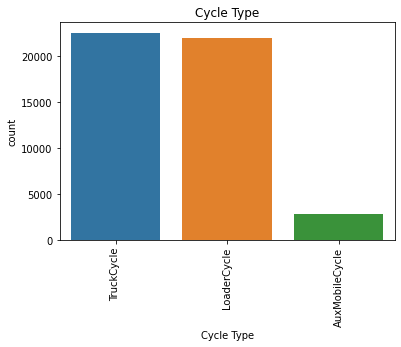

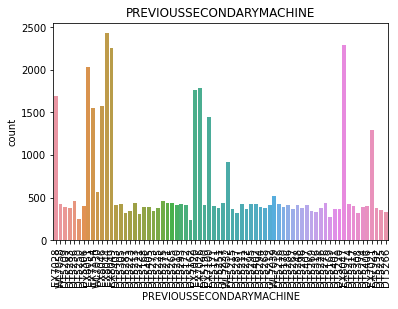

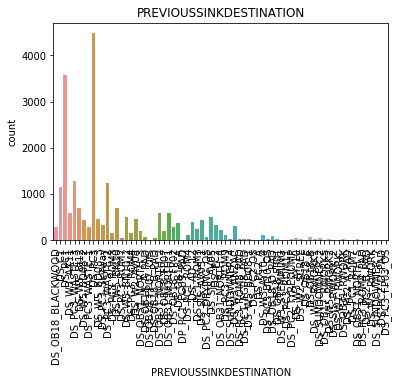

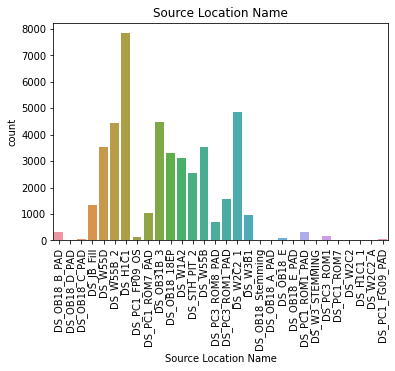

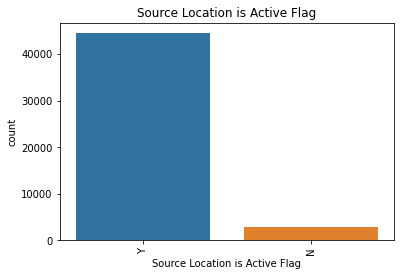

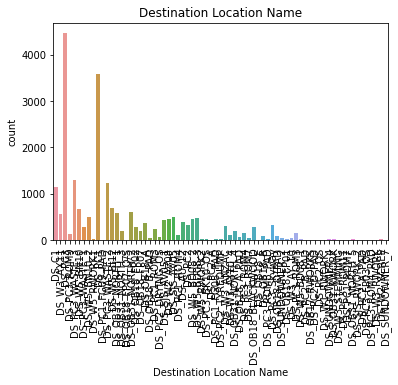

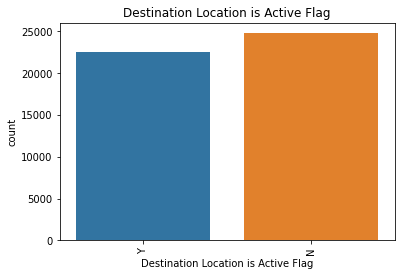

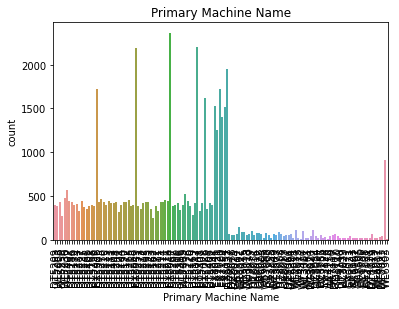

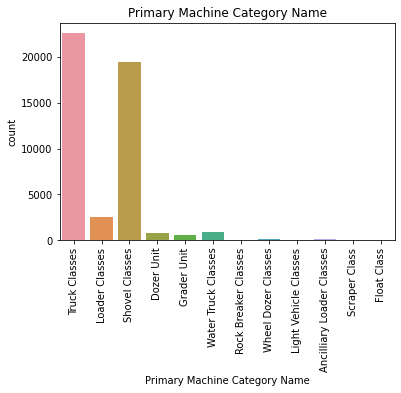

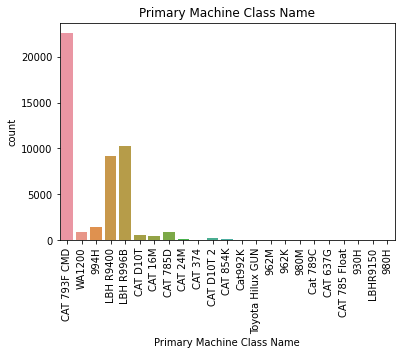

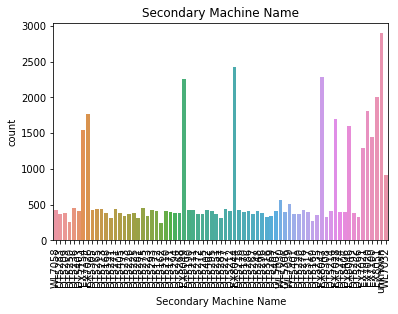

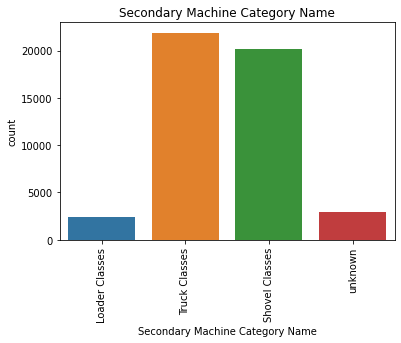

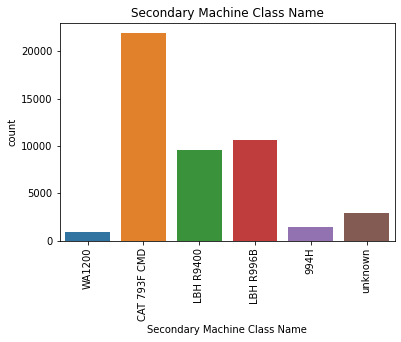

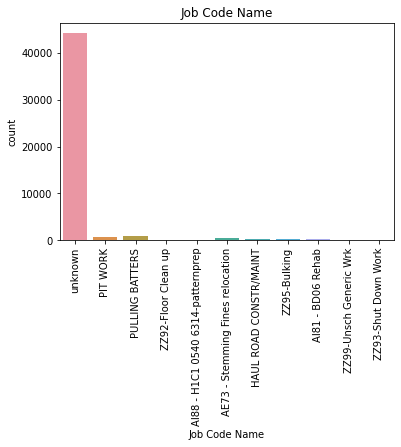

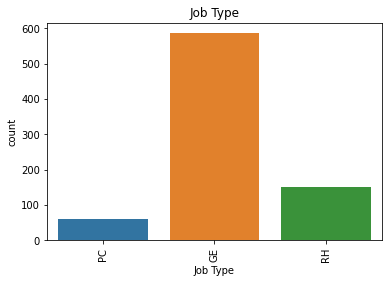

In [21]:
#Using for loop, a multiple plots is plotted for Truck, Loader and Auxmobile
for column in c_c[0:15]:
    sns.countplot(x= column, data = c_k)
    plt.xticks(rotation=90)
    plt.title(column)
    plt.show()

### Now to detect outliers For Numerical Columns

In [22]:
#To analyze the numerical columns object data types are exculded from the dataset
c_n = c_k.select_dtypes(exclude='object').columns

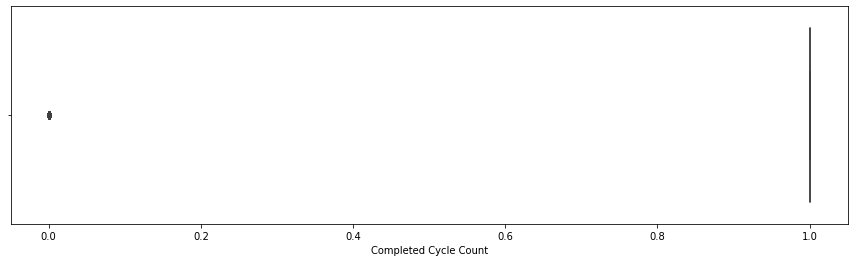

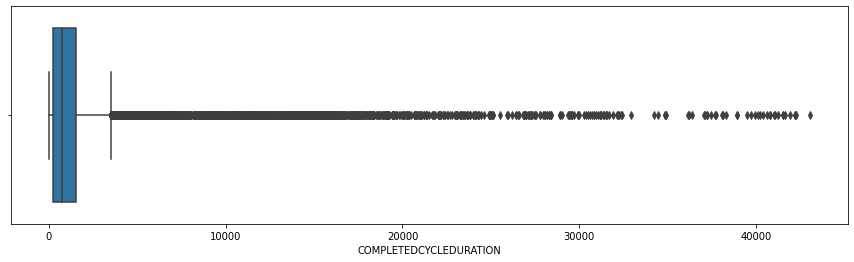

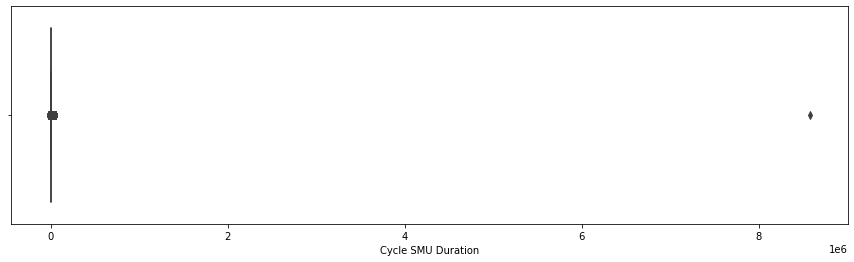

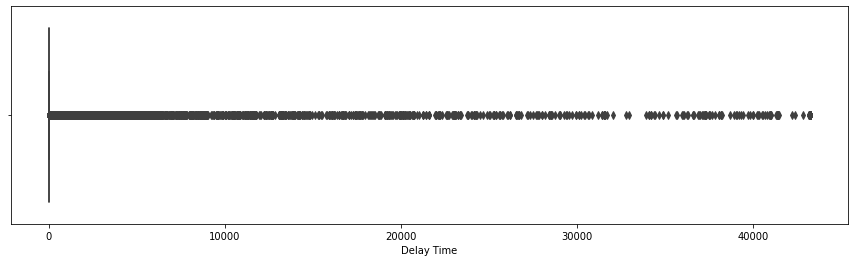

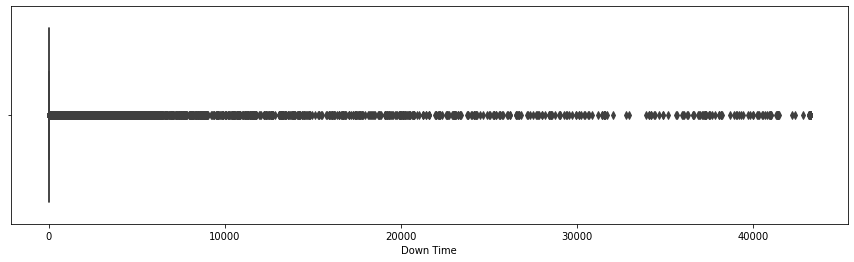

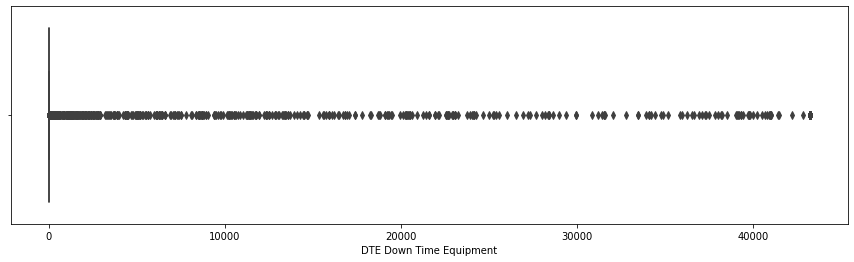

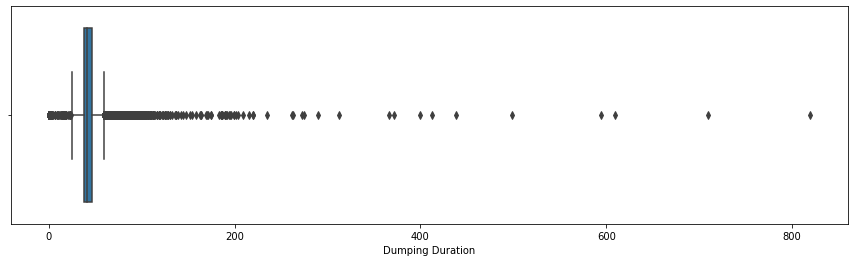

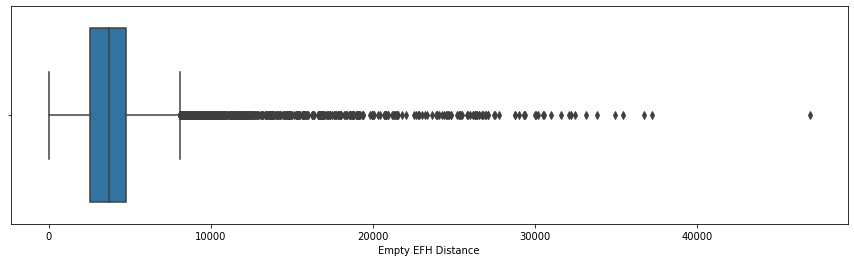

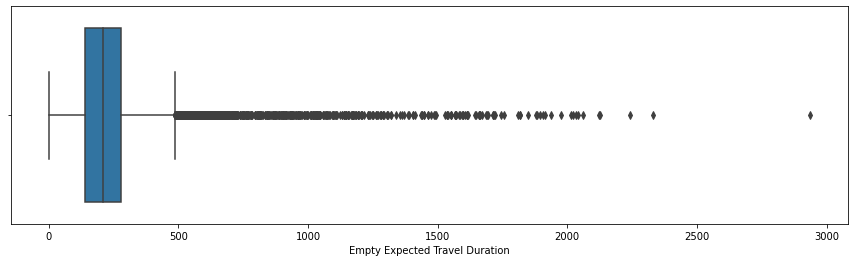

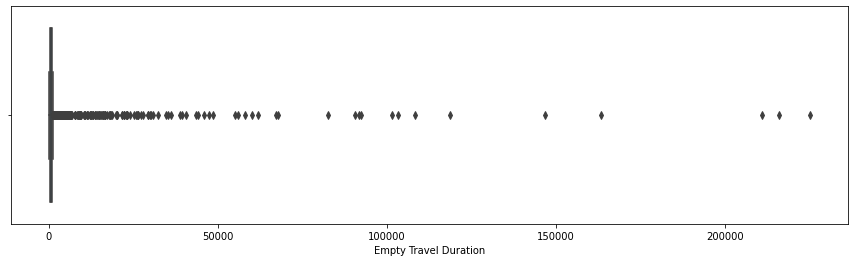

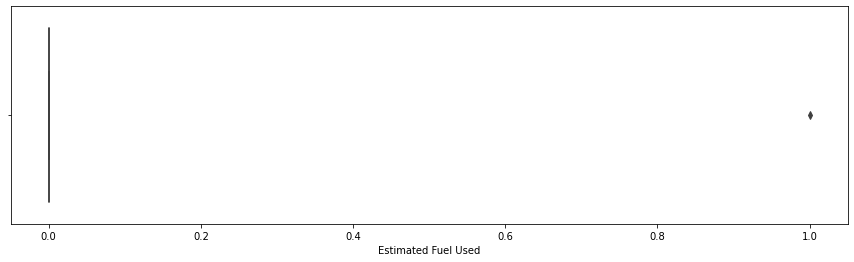

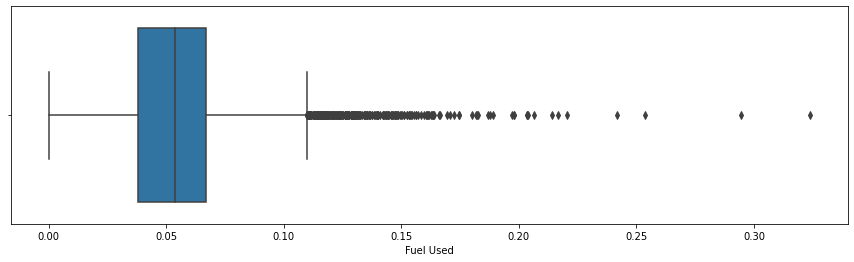

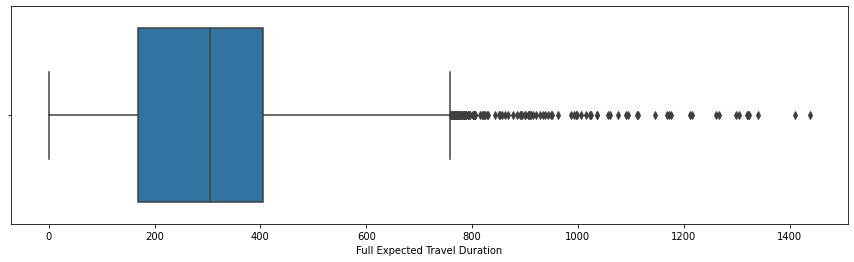

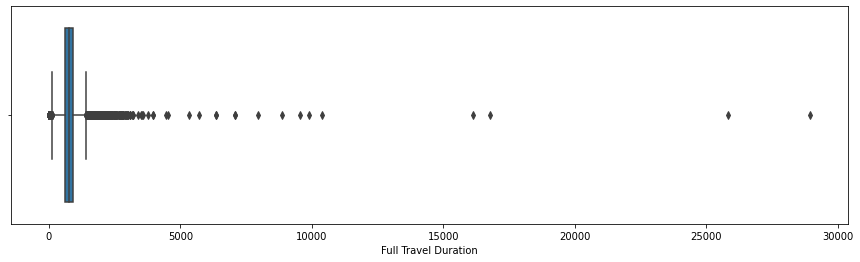

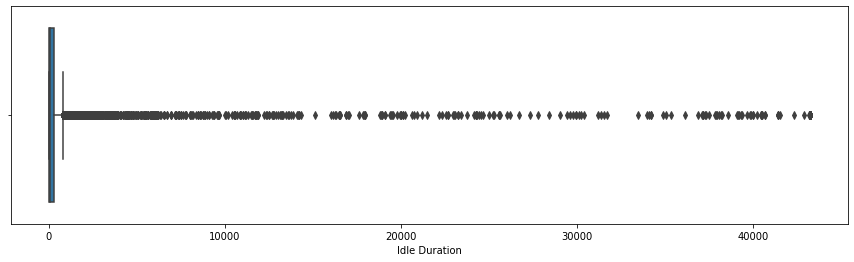

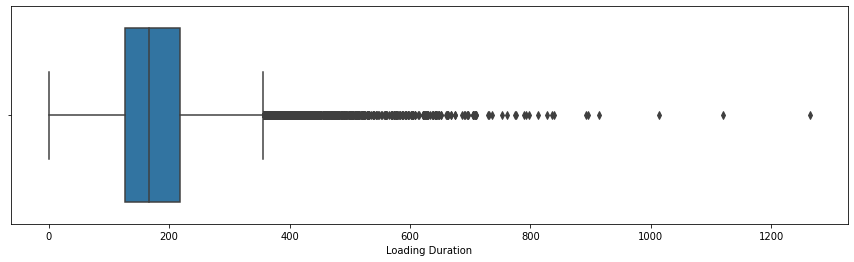

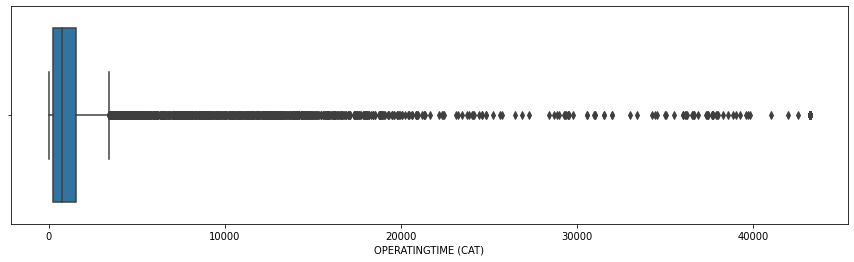

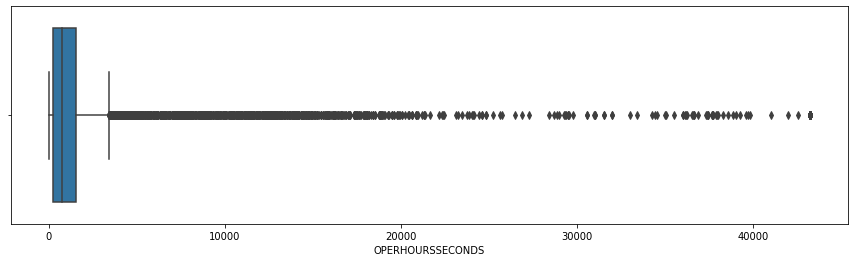

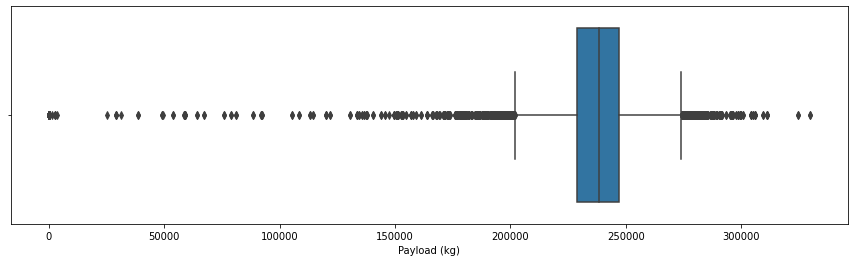

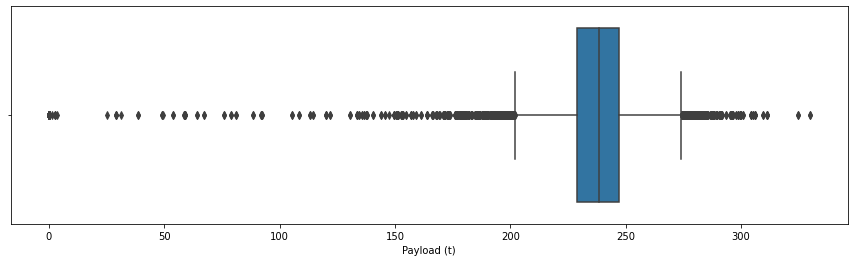

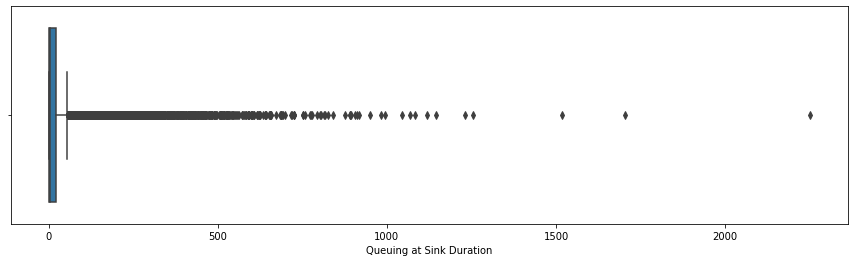

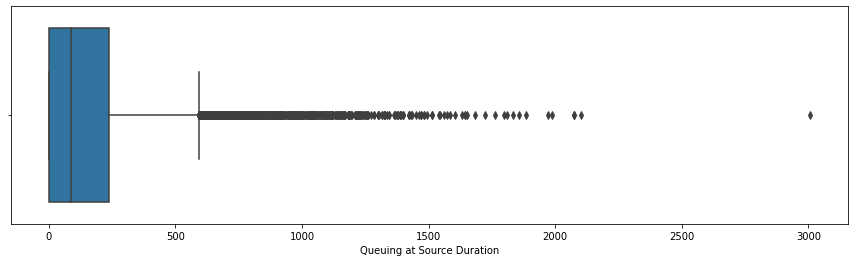

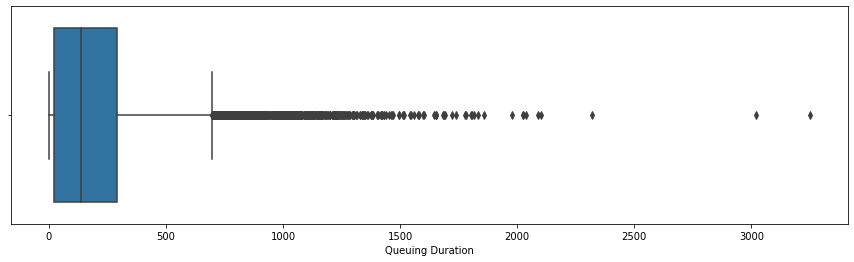

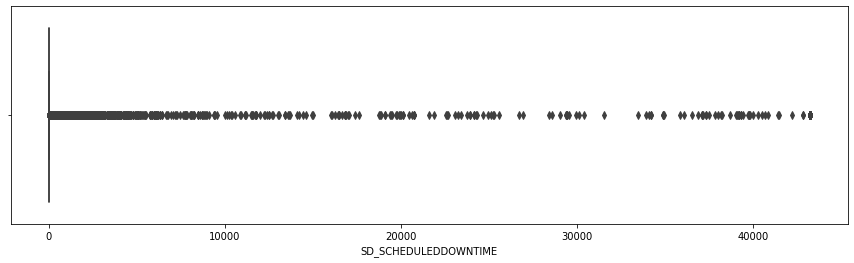

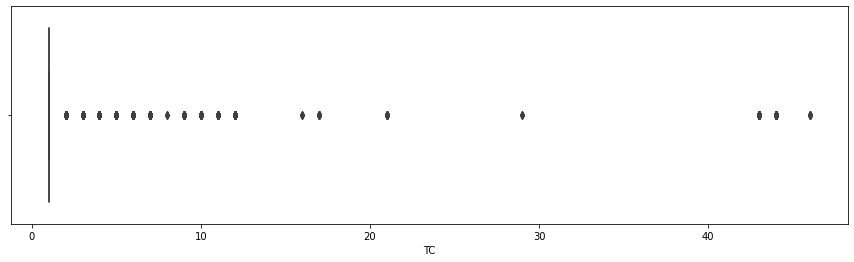

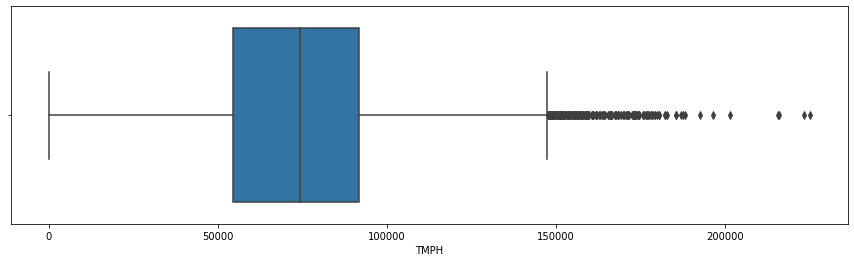

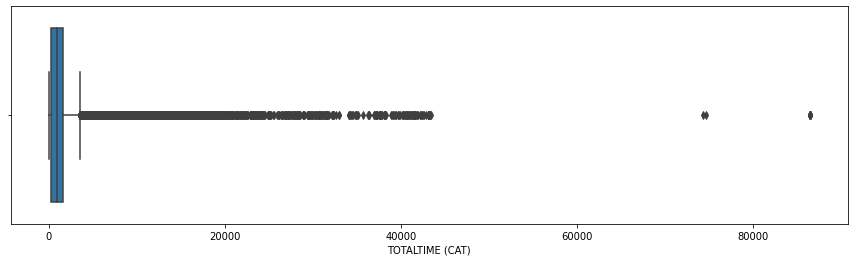

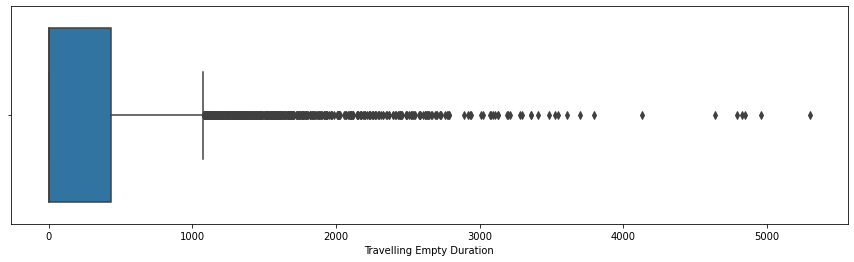

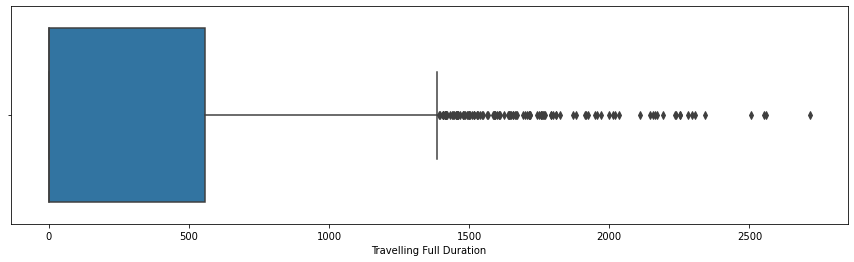

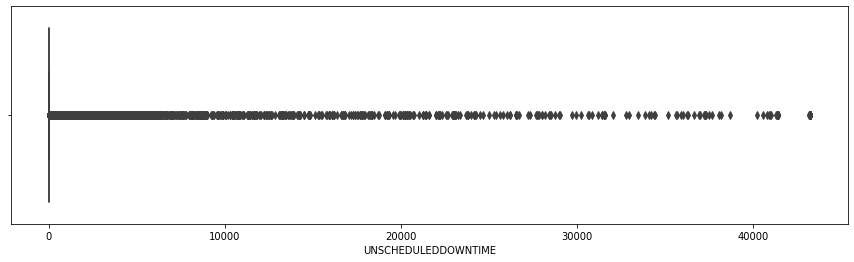

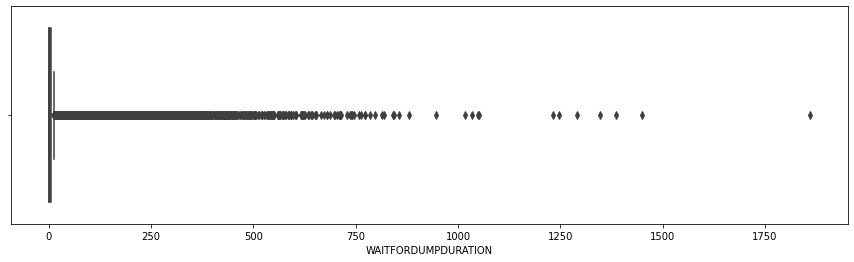

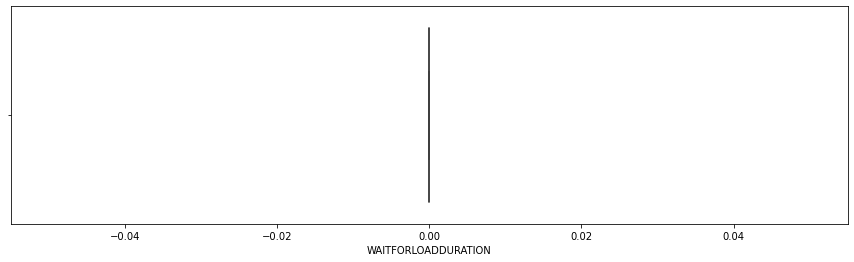

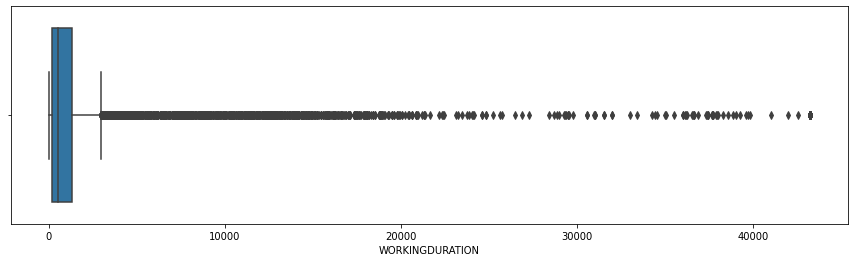

In [23]:
#Using for loop, the outliers for multiple columns is analyzed using box-plot
for i in c_n[1:]:
    plt.figure(figsize=(15,4))
    sns.boxplot(c_k[i])
    plt.show()

In [24]:
#Now replacing 'Completed Cycle Count' by 'Yes' or 'No' Attributes using Lambda function
c_k["Completed Cycle Count"] = c_k[["Completed Cycle Count"]].apply(lambda x: x.map({0:'No', 1:'Yes'}))

### Extracting Movement Data from Cycle Data

In [25]:
##Extracting only truck cycle
movement = c_k[c_k["Cycle Type"]=="TruckCycle"][["Primary Machine Name", "Source Location Name", "Destination Location Name", "Payload (kg)", "Cycle Start Timestamp in MM:SS", "Cycle End Timestamp in MM:SS", "Completed Cycle Count", "COMPLETEDCYCLEDURATION"]]

In [26]:
movement.tail(10)

,Primary Machine Name,Source Location Name,Destination Location Name,Payload (kg),Cycle Start Timestamp in MM:SS,Cycle End Timestamp in MM:SS,Completed Cycle Count,COMPLETEDCYCLEDURATION
47334,DT5209,DS_W55D,DS_PC3,234100.0,2020-07-23 19:05:02,2020-07-23 19:26:41,Yes,1299
47335,DT5405,DS_W55D,DS_PC3,261000.0,2020-07-23 19:20:17,2020-07-23 19:43:47,Yes,1410
47336,DT5273,DS_W55D,DS_PC3,255400.0,2020-07-23 19:27:53,2020-07-23 19:53:10,Yes,1517
47337,DT5271,DS_W55D,DS_PC3,246700.0,2020-07-23 19:00:00,2020-07-23 19:24:21,Yes,1461
47338,DT5223,DS_W55D,DS_PC3,241300.0,2020-07-23 19:15:28,2020-07-23 19:33:23,Yes,1075
47339,DT5221,DS_W55D,DS_PC3,245100.0,2020-07-23 19:31:23,2020-07-23 19:58:44,Yes,1641
47340,DT5275,DS_W55D,DS_PC3,241200.0,2020-07-23 18:11:08,2020-07-23 18:38:15,Yes,1627
47341,DT5281,DS_W55D,DS_PC3,236300.0,2020-07-23 18:20:32,2020-07-23 18:42:00,Yes,1288
47342,DT5305,DS_W55D,DS_PC3,240200.0,2020-07-23 18:28:14,2020-07-23 18:53:47,Yes,1533
47343,DT5213,DS_W55D,DS_PC3,235900.0,2020-07-23 18:00:00,2020-07-23 18:33:56,Yes,2036


In [27]:
movement.reset_index(inplace=True, drop=True)

In [28]:
movement

,Primary Machine Name,Source Location Name,Destination Location Name,Payload (kg),Cycle Start Timestamp in MM:SS,Cycle End Timestamp in MM:SS,Completed Cycle Count,COMPLETEDCYCLEDURATION
0,DT5209,DS_OB18_B_PAD,DS_C1,260300.0,2020-07-20 02:03:25,2020-07-20 02:15:42,Yes,737
1,DT5209,DS_OB18_B_PAD,DS_C1,224400.0,2020-07-20 04:49:53,2020-07-20 04:58:40,Yes,527
2,DT5283,DS_OB18_B_PAD,DS_C1,232800.0,2020-07-20 05:20:01,2020-07-20 05:28:17,Yes,496
3,DT5283,DS_OB18_B_PAD,DS_C1,238100.0,2020-07-20 03:09:55,2020-07-20 03:21:49,Yes,714
4,DT5283,DS_OB18_B_PAD,DS_C1,228800.0,2020-07-20 04:54:00,2020-07-20 05:02:32,Yes,512
...,...,...,...,...,...,...,...,...
22585,DT5221,DS_W55D,DS_PC3,245100.0,2020-07-23 19:31:23,2020-07-23 19:58:44,Yes,1641
22586,DT5275,DS_W55D,DS_PC3,241200.0,2020-07-23 18:11:08,2020-07-23 18:38:15,Yes,1627
22587,DT5281,DS_W55D,DS_PC3,236300.0,2020-07-23 18:20:32,2020-07-23 18:42:00,Yes,1288
22588,DT5305,DS_W55D,DS_PC3,240200.0,2020-07-23 18:28:14,2020-07-23 18:53:47,Yes,1533


In [29]:
movement[movement["Completed Cycle Count"]=="No"].head()

,Primary Machine Name,Source Location Name,Destination Location Name,Payload (kg),Cycle Start Timestamp in MM:SS,Cycle End Timestamp in MM:SS,Completed Cycle Count,COMPLETEDCYCLEDURATION
75,DT5283,DS_W55D,DS_PC3,0.0,2020-07-23 17:59:20,2020-07-23 18:00:00,No,0
76,DT5225,DS_W55D,DS_PC3,0.0,2020-07-23 17:53:31,2020-07-23 18:00:00,No,0
77,DT5213,DS_W55D,DS_PC3,0.0,2020-07-23 17:58:50,2020-07-23 18:00:00,No,0
122,DT5215,DS_W55B_2,DS_PC3,0.0,2020-07-27 17:31:01,2020-07-27 18:00:00,No,0
143,DT5171,DS_W55B_2,DS_PC3,0.0,2020-07-27 17:38:30,2020-07-27 18:00:00,No,0


In [30]:
movement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22590 entries, 0 to 22589
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Primary Machine Name            22590 non-null  object 
 1   Source Location Name            22563 non-null  object 
 2   Destination Location Name       22555 non-null  object 
 3   Payload (kg)                    22590 non-null  float64
 4   Cycle Start Timestamp in MM:SS  22590 non-null  object 
 5   Cycle End Timestamp in MM:SS    22590 non-null  object 
 6   Completed Cycle Count           22590 non-null  object 
 7   COMPLETEDCYCLEDURATION          22590 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ MB


In [31]:
movement.shape

(22590, 8)

In [32]:
#Inserting Movement ID Column
movement.insert(6,"Movement_Id",pd.Series(np.arange(1,22591)))

In [33]:
movement.head()

,Primary Machine Name,Source Location Name,Destination Location Name,Payload (kg),Cycle Start Timestamp in MM:SS,Cycle End Timestamp in MM:SS,Movement_Id,Completed Cycle Count,COMPLETEDCYCLEDURATION
0,DT5209,DS_OB18_B_PAD,DS_C1,260300.0,2020-07-20 02:03:25,2020-07-20 02:15:42,1,Yes,737
1,DT5209,DS_OB18_B_PAD,DS_C1,224400.0,2020-07-20 04:49:53,2020-07-20 04:58:40,2,Yes,527
2,DT5283,DS_OB18_B_PAD,DS_C1,232800.0,2020-07-20 05:20:01,2020-07-20 05:28:17,3,Yes,496
3,DT5283,DS_OB18_B_PAD,DS_C1,238100.0,2020-07-20 03:09:55,2020-07-20 03:21:49,4,Yes,714
4,DT5283,DS_OB18_B_PAD,DS_C1,228800.0,2020-07-20 04:54:00,2020-07-20 05:02:32,5,Yes,512


## Delay Table

#### Now from the delay dataset, key columns are taken separately

In [34]:
#Selecting Key Columns
d_k = delay[["Delay OID", "Description", "Engine Stopped Flag", "Field Notification Required Flag", "Production Reporting Only Flag", "Delay Class Name", "Delay Class Category Name", "Target Machine Name", "Target Machine Class Name", "Target Machine Class Description", "Target Machine Class Category Name", "Delay Start Timestamp (GMT8)", "Delay Finish Timestamp (GMT8)"]]

In [35]:
d_k.head()

,Delay OID,Description,Engine Stopped Flag,Field Notification Required Flag,Production Reporting Only Flag,Delay Class Name,Delay Class Category Name,Target Machine Name,Target Machine Class Name,Target Machine Class Description,Target Machine Class Category Name,Delay Start Timestamp (GMT8),Delay Finish Timestamp (GMT8)
0,10721642969,MACHINE GEN Started a delay: 2110_Operator_Hot...,N,N,Y,2110_Operator_Hot_Seat,Scheduled Process Down,WL7030,994H,Wheel Loader,Loader Classes,2020-07-26 02:04:59,2020-07-26 02:08:41
1,10721643044,6026,N,Y,Y,4070_Wait_on_Access,Unscheduled Process Down,DT5266,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 01:59:06,2020-07-26 02:05:54
2,10721643462,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]],N,N,Y,8200 Health Event,Unscheduled Equipment Down,DT5271,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 02:06:13,2020-07-26 02:06:24
3,10721643635,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]] acces...,N,Y,Y,4170_Operator_Equipment_Checks,Unscheduled Process Down,DT5271,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 02:06:25,2020-07-26 02:23:48
4,10721645207,5271,N,Y,N,7410_Behind_Delayed_Machine,Unscheduled Process Down,DT5212,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 02:09:44,2020-07-26 02:15:00


In [36]:
d_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Delay OID                           8782 non-null   int64 
 1   Description                         6701 non-null   object
 2   Engine Stopped Flag                 8782 non-null   object
 3   Field Notification Required Flag    8782 non-null   object
 4   Production Reporting Only Flag      8782 non-null   object
 5   Delay Class Name                    8782 non-null   object
 6   Delay Class Category Name           8782 non-null   object
 7   Target Machine Name                 8782 non-null   object
 8   Target Machine Class Name           8782 non-null   object
 9   Target Machine Class Description    8782 non-null   object
 10  Target Machine Class Category Name  8782 non-null   object
 11  Delay Start Timestamp (GMT8)        8782 non-null   obje

In [37]:
#Coverting Delay Start and Finish into Timestamp Datatypes as we did for cycle dataset
d_k['Delay Start Timestamp (GMT8)'] = d_k['Delay Start Timestamp (GMT8)'].astype('datetime64')

d_k['Delay Finish Timestamp (GMT8)'] = d_k['Delay Finish Timestamp (GMT8)'].astype('datetime64')

In [38]:
#Inserting "Delay Finish - Start" Column to know the Measurement
d_k["Delay Finish - Start"] = (d_k['Delay Finish Timestamp (GMT8)'] - d_k['Delay Start Timestamp (GMT8)']).astype('timedelta64[s]')

d_k["Delay Finish - Start"] = d_k["Delay Finish - Start"].astype('int64')

In [39]:
d_k.head()

,Delay OID,Description,Engine Stopped Flag,Field Notification Required Flag,Production Reporting Only Flag,Delay Class Name,Delay Class Category Name,Target Machine Name,Target Machine Class Name,Target Machine Class Description,Target Machine Class Category Name,Delay Start Timestamp (GMT8),Delay Finish Timestamp (GMT8),Delay Finish - Start
0,10721642969,MACHINE GEN Started a delay: 2110_Operator_Hot...,N,N,Y,2110_Operator_Hot_Seat,Scheduled Process Down,WL7030,994H,Wheel Loader,Loader Classes,2020-07-26 02:04:59,2020-07-26 02:08:41,222
1,10721643044,6026,N,Y,Y,4070_Wait_on_Access,Unscheduled Process Down,DT5266,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 01:59:06,2020-07-26 02:05:54,408
2,10721643462,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]],N,N,Y,8200 Health Event,Unscheduled Equipment Down,DT5271,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 02:06:13,2020-07-26 02:06:24,11
3,10721643635,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]] acces...,N,Y,Y,4170_Operator_Equipment_Checks,Unscheduled Process Down,DT5271,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 02:06:25,2020-07-26 02:23:48,1043
4,10721645207,5271,N,Y,N,7410_Behind_Delayed_Machine,Unscheduled Process Down,DT5212,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Truck Classes,2020-07-26 02:09:44,2020-07-26 02:15:00,316


In [40]:
d_k[d_k['Target Machine Name'] == 'DT5216'].groupby(by=["Target Machine Name"]).sum()

,Delay OID,Delay Finish - Start
Target Machine Name,,
DT5216,954130939886,71340


#### Now that delay function is read, understand and analyzed, location dataset is next to be analyzed

### Location

In [41]:
location

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552
5,6,DS_W1A2,23.164861,4202.946825
6,7,DS_W2C2_1,23.374642,4043.319503
7,8,DS_W55B,23.378768,4205.860720
8,9,DS_W55B_2,23.371916,4056.194529
9,10,DS_W55D,23.371724,4045.024300


In [42]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location_Id  31 non-null     int64  
 1   Name         31 non-null     object 
 2   Latitude     31 non-null     float64
 3   Longitude    31 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [43]:
location.Name.value_counts()

DS_OB31_NORTH_2      2
DS_H1C1              1
DS_W5_BD08_2         1
1.0                  1
0.30617088           1
DS_C1                1
DS_W2_AV08           1
DS_OB18_FP02         1
DS_OB18_A            1
DS_PC3_WASTE_3       1
DS_OB18_BLACKWOOD    1
DS_AU_12             1
DS_W5_BN10_2         1
DS_W5_BN10           1
DS_W5_BI12           1
DS_W3_AX11           1
DS_JB_Fill           1
DS_SJS_AV05_1        1
DS_PC3               1
DS_PC1               1
DS_OB31_NORTH_3      1
DS_W55D              1
DS_W55B_2            1
DS_W55B              1
DS_W2C2_1            1
DS_W1A2              1
DS_STH_PIT_2         1
DS_OB31B_3           1
DS_OB18_18EP         1
DS_W3_ANZAC          1
Name: Name, dtype: int64

In [44]:
#Removing the Rows which does not create any impact on analysis
location = location.drop(index=[10, 28, 29])

In [45]:
location.reset_index(inplace=True, drop=True)

In [46]:
location

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552
5,6,DS_W1A2,23.164861,4202.946825
6,7,DS_W2C2_1,23.374642,4043.319503
7,8,DS_W55B,23.378768,4205.860720
8,9,DS_W55B_2,23.371916,4056.194529
9,10,DS_W55D,23.371724,4045.024300


In [47]:
## Creating Two separate Table Based on Location Type
#Destination Location
Dest_Location = location[location.Latitude < 0]

In [48]:
Dest_Location.reset_index(inplace=True, drop=True)

In [49]:
Dest_Location.columns = ['Dest_Location_Id', 'Dest_Name', 'Dest_Latitude', 'Dest_Longitude']

In [50]:
#Source Location
Source_Location = location[location.Latitude > 0]

In [51]:
Source_Location.columns = ['Source_Location_Id', 'Source_Name', 'Source_Latitude', 'Source_Longitude']

In [52]:
Source_Location

,Source_Location_Id,Source_Name,Source_Latitude,Source_Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552
5,6,DS_W1A2,23.164861,4202.946825
6,7,DS_W2C2_1,23.374642,4043.319503
7,8,DS_W55B,23.378768,4205.860720
8,9,DS_W55B_2,23.371916,4056.194529
9,10,DS_W55D,23.371724,4045.024300


### Merging the Location Type Tables in Movement Data

In [53]:
movement_key = movement.merge(Source_Location, how='left', left_on=["Source Location Name"], right_on=["Source_Name"])

In [54]:
movement_key = movement_key.merge(Dest_Location, how='left', left_on=["Destination Location Name"], right_on=["Dest_Name"])

In [55]:
#Dropping Unnecessary Columns
movement_key.drop(columns=['Source_Name','Source_Location_Id', 'Dest_Name', 'Dest_Location_Id'], inplace=True)

In [56]:
movement_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22590 entries, 0 to 22589
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Primary Machine Name            22590 non-null  object 
 1   Source Location Name            22563 non-null  object 
 2   Destination Location Name       22555 non-null  object 
 3   Payload (kg)                    22590 non-null  float64
 4   Cycle Start Timestamp in MM:SS  22590 non-null  object 
 5   Cycle End Timestamp in MM:SS    22590 non-null  object 
 6   Movement_Id                     22590 non-null  int32  
 7   Completed Cycle Count           22590 non-null  object 
 8   COMPLETEDCYCLEDURATION          22590 non-null  int64  
 9   Source_Latitude                 19828 non-null  float64
 10  Source_Longitude                19828 non-null  float64
 11  Dest_Latitude                   16722 non-null  float64
 12  Dest_Longitude                  

In [57]:
movement_key

,Primary Machine Name,Source Location Name,Destination Location Name,Payload (kg),Cycle Start Timestamp in MM:SS,Cycle End Timestamp in MM:SS,Movement_Id,Completed Cycle Count,COMPLETEDCYCLEDURATION,Source_Latitude,Source_Longitude,Dest_Latitude,Dest_Longitude
0,DT5209,DS_OB18_B_PAD,DS_C1,260300.0,2020-07-20 02:03:25,2020-07-20 02:15:42,1,Yes,737,NaN,NaN,-23.332080,120.051541
1,DT5209,DS_OB18_B_PAD,DS_C1,224400.0,2020-07-20 04:49:53,2020-07-20 04:58:40,2,Yes,527,NaN,NaN,-23.332080,120.051541
2,DT5283,DS_OB18_B_PAD,DS_C1,232800.0,2020-07-20 05:20:01,2020-07-20 05:28:17,3,Yes,496,NaN,NaN,-23.332080,120.051541
3,DT5283,DS_OB18_B_PAD,DS_C1,238100.0,2020-07-20 03:09:55,2020-07-20 03:21:49,4,Yes,714,NaN,NaN,-23.332080,120.051541
4,DT5283,DS_OB18_B_PAD,DS_C1,228800.0,2020-07-20 04:54:00,2020-07-20 05:02:32,5,Yes,512,NaN,NaN,-23.332080,120.051541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22585,DT5221,DS_W55D,DS_PC3,245100.0,2020-07-23 19:31:23,2020-07-23 19:58:44,22586,Yes,1641,23.371724,4045.0243,-23.383169,120.181625
22586,DT5275,DS_W55D,DS_PC3,241200.0,2020-07-23 18:11:08,2020-07-23 18:38:15,22587,Yes,1627,23.371724,4045.0243,-23.383169,120.181625
22587,DT5281,DS_W55D,DS_PC3,236300.0,2020-07-23 18:20:32,2020-07-23 18:42:00,22588,Yes,1288,23.371724,4045.0243,-23.383169,120.181625
22588,DT5305,DS_W55D,DS_PC3,240200.0,2020-07-23 18:28:14,2020-07-23 18:53:47,22589,Yes,1533,23.371724,4045.0243,-23.383169,120.181625


#### Merging Location Type Tables in Cycle Data

In [58]:
c_k = c_k.merge(Source_Location, how='left', left_on=["Source Location Name"], right_on=["Source_Name"])

In [59]:
c_k = c_k.merge(Dest_Location, how='left', left_on=["Destination Location Name"], right_on=["Dest_Name"])

In [60]:
#Dropping Unnecessary Columns
c_k.drop(columns=['Source_Name','Source_Location_Id', 'Dest_Name', 'Dest_Location_Id'], inplace=True)

In [61]:
c_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47344 entries, 0 to 47343
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Available Time                       47344 non-null  int64  
 1   Completed Cycle Count                47344 non-null  object 
 2   COMPLETEDCYCLEDURATION               47344 non-null  int64  
 3   Cycle SMU Duration                   47344 non-null  int64  
 4   Cycle Type                           47344 non-null  object 
 5   Delay Time                           47344 non-null  int64  
 6   Down Time                            47344 non-null  int64  
 7   DTE Down Time Equipment              47344 non-null  int64  
 8   Dumping Duration                     22590 non-null  float64
 9   Empty EFH Distance                   22590 non-null  float64
 10  Empty Expected Travel Duration       22590 non-null  float64
 11  Empty Travel Duration       

In [62]:
### Once the dataset is cleaned, it is transfered for SQL Process.

In [70]:
cycle_key_data = c_k.to_csv('cycle_key_imp.csv',index = True)
delay_key_data = d_k.to_csv('delay_key_imp.csv',index=True)
movement_key_data = movement_key.to_csv('movement_key_imp.csv',index=True)